In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('screentime_analysis.csv')

### Lectura y limpieza de los datos

In [3]:
#1. Fecha: La fecha de los datos registrados.
#2. Aplicación: El nombre de la aplicación móvil.
#3. Uso (minutos): Total de minutos dedicados a utilizar la aplicación en un día determinado.
#4. Notificaciones: Número de notificaciones recibidas de la aplicación.
#5. Veces abierta: Cuántas veces se inició la aplicación.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [4]:
df.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [6]:
df.isnull()

,Date,App,Usage (minutes),Notifications,Times Opened
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [20]:
# Convertir la columna "Date" al tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Crear nuevas columnas para el día, mes y año
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Mostrar el resultado
print(df)

          Date        App  Usage (minutes)  Notifications  Times Opened  \
0   2024-08-07  Instagram               81             24            57   
1   2024-08-08  Instagram               90             30            53   
2   2024-08-26  Instagram              112             33            17   
3   2024-08-22  Instagram               82             11            38   
4   2024-08-12  Instagram               59             47            16   
..         ...        ...              ...            ...           ...   
195 2024-08-10   LinkedIn               22             12             5   
196 2024-08-23   LinkedIn                5              7             1   
197 2024-08-18   LinkedIn               19              2             5   
198 2024-08-26   LinkedIn               21             14             1   
199 2024-08-02   LinkedIn               13              4             1   

    date_added  Day  Month  Year  
0   2024-08-07    7      8  2024  
1   2024-08-08    8      8  2

### No hay datos faltantes ni repetidos incorrectamente

## EDA

### Analizar el tiempo de uso de cada aplicación a lo largo del mes.

### Investigar las relaciones entre las notificaciones y la interacción con la aplicación.

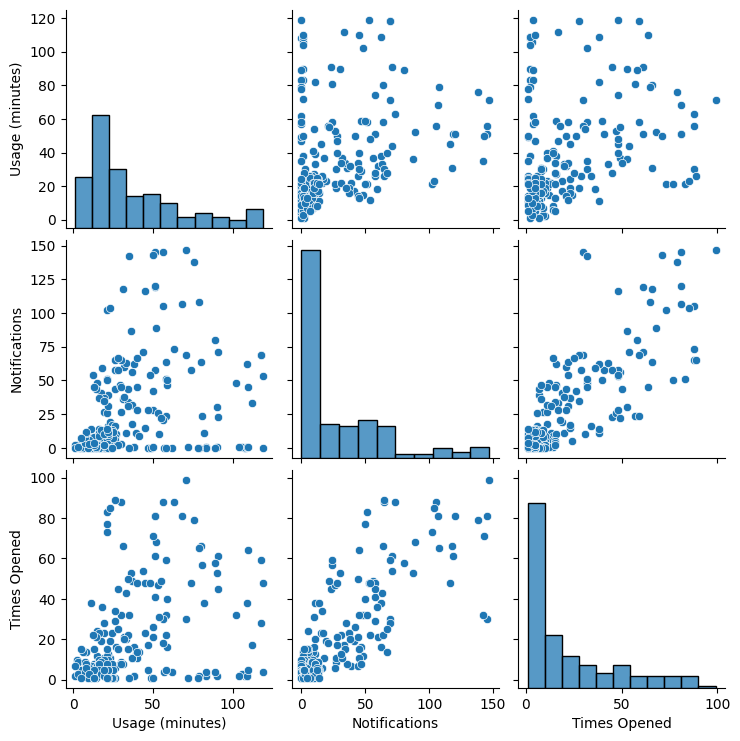

In [12]:
vars1 = [ 'Usage (minutes)', 'Notifications', 'Times Opened']
pair_plot = sns.pairplot(df[vars1].iloc[0:10000])
plt.show()

### Me fijo que esten todos los dias del mes

In [59]:
# Estan todos los dias del mes de Agosto del 2024 (son 30). 
# Los dias se repiten porque las mismas app se abren varias veces en el mismo dia

days = df['Day'].sort_values()

In [22]:
## Hay la misma cantidad de aplicaciones para la columna App

applications = df['App'].value_counts()
print(applications)

App
Instagram      25
X              25
WhatsApp       25
8 Ball Pool    25
Safari         25
Netflix        25
Facebook       25
LinkedIn       25
Name: count, dtype: int64


### Calulamos los minutos (durante todo Agosto) usado en cada App

           App  Usage (minutes)
2    Instagram             1898
4      Netflix             1819
6     WhatsApp             1204
1     Facebook              842
7            X              675
0  8 Ball Pool              452
3     LinkedIn              390
5       Safari              270


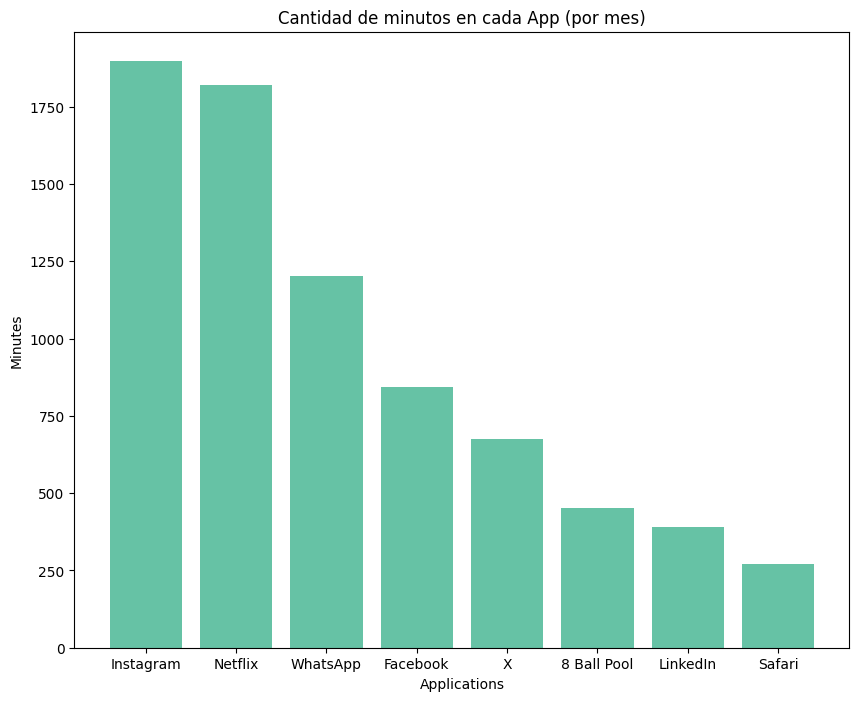

In [48]:
#Calcular los minutos usados en cada app
uso_app = df.groupby('App')['Usage (minutes)'].sum().reset_index()

#Ordenamos de mayor a menor por minutos en cada app
uso_app_ordenado = uso_app.sort_values(by='Usage (minutes)', ascending=False) 


print(uso_app_ordenado)

plt.figure(figsize=(10,8))
plt.bar(uso_app_ordenado['App'], uso_app_ordenado['Usage (minutes)'], color='#66c2a5')
plt.title('Cantidad de minutos en cada App (por mes)')
plt.xlabel('Applications')
plt.ylabel('Minutes')
plt.show()


### Agregamos una nueva columna que calcule los minutos usado en cada App, pero por día

In [51]:
# Esta nueva columna se calcula diviendo el total de minutos por la cantidad de dias del mes (30)
uso_app_ordenado['Usage per Day (minute)'] = uso_app_ordenado['Usage (minutes)']/30

# Ordenamos los resultados de manera descendente
uso_app_ordenado = uso_app_ordenado.sort_values(by='Usage per Day (minute)', ascending=False)

# Mostrar el resultado
print(uso_app_ordenado)

           App  Usage (minutes)  Usage per Day (minute)
2    Instagram             1898               63.266667
4      Netflix             1819               60.633333
6     WhatsApp             1204               40.133333
1     Facebook              842               28.066667
7            X              675               22.500000
0  8 Ball Pool              452               15.066667
3     LinkedIn              390               13.000000
5       Safari              270                9.000000


### Dejamos a un lado los minutos por mes, para que quede mas limpio

In [56]:
app_for_day = uso_app_ordenado.groupby('App')['Usage per Day (minute)'].sum().reset_index()
app_for_day = app_for_day.sort_values(by='Usage per Day (minute)', ascending=False)
print(app_for_day)

           App  Usage per Day (minute)
2    Instagram               63.266667
4      Netflix               60.633333
6     WhatsApp               40.133333
1     Facebook               28.066667
7            X               22.500000
0  8 Ball Pool               15.066667
3     LinkedIn               13.000000
5       Safari                9.000000
